# **Roboflow Dataset Link -** 'https://universe.roboflow.com/roboflow-100/animals-ij5d2'

# **Install Dependencies**

In [1]:
!pip install -q ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 108.3 MB/s eta 0:00:00


# **Import Modules**

In [2]:
import os
import random
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO
from roboflow import Roboflow
import pandas as pd

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# **Load The Dataset**

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="5tiVmFnSNXE8lmBhSdK1")
project = rf.workspace("roboflow-100").project("animals-ij5d2")
version = project.version(2)
dataset = version.download("yolov8")

print("✅ Dataset downloaded successfully!")
print("Dataset location:", dataset.location)

loading Roboflow workspace...
loading Roboflow project...
✅ Dataset downloaded successfully!
Dataset location: /content/animals-2


# **Rename Dataset Folder**

In [5]:
old_name = 'animals-2'
new_name = 'Animal_Detection_Datasets'

# Rename the directory
os.rename(old_name, new_name)

In [6]:
print(dataset.location)

/content/animals-2


# **Data Preprocessing**

In [7]:
dataset.location = '/content/Animal_Detection_Datasets'

In [8]:
# Fix data.yaml

import yaml

FIXED_YAML_PATH = f"{dataset.location}/data_fixed.yaml"

data = {
    "train": f"{dataset.location}/train/images",
    "val": f"{dataset.location}/valid/images",
    "test": f"{dataset.location}/test/images",
    "nc": 10,
    "names": [
        "cat", "chicken", "cow", "dog", "fox",
        "goat", "horse", "person", "racoon", "skunk"
    ]
}

with open(FIXED_YAML_PATH, "w") as f:
    yaml.dump(data, f)

print("✅ Fixed YAML created at:", FIXED_YAML_PATH)


✅ Fixed YAML created at: /content/Animal_Detection_Datasets/data_fixed.yaml


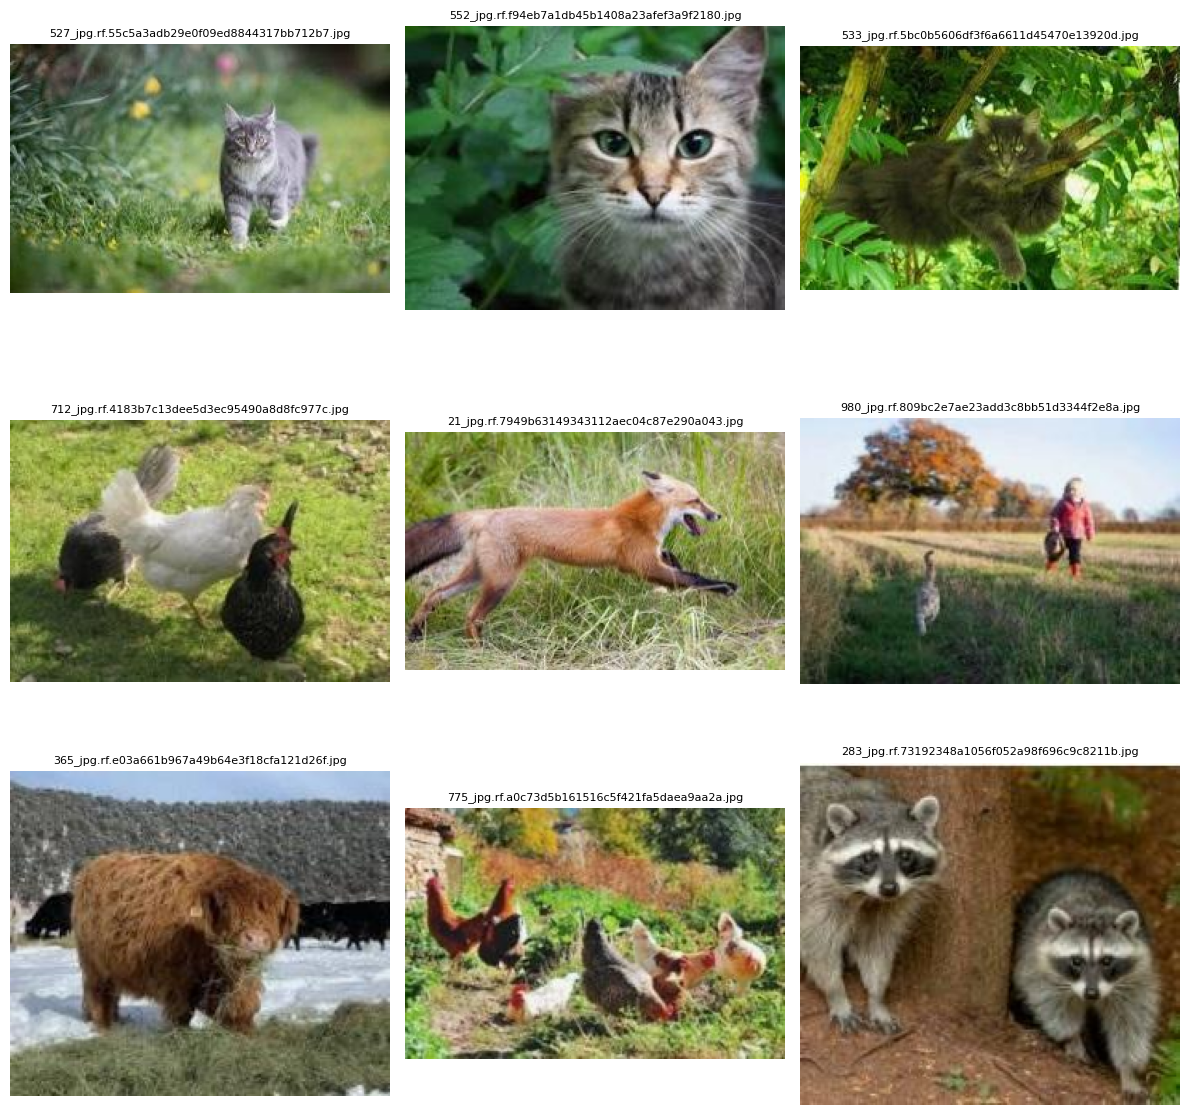

In [10]:
# Visualize Random Train Images (Before Training)

TRAIN_IMG_DIR = f'{dataset.location}/train/images'

train_images = os.listdir(TRAIN_IMG_DIR)
sample_images = random.sample(train_images, 9)

plt.figure(figsize=(12, 12))

for i, image_name in enumerate(sample_images):
  image_path = os.path.join(TRAIN_IMG_DIR, image_name)

  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  plt.subplot(3, 3, i+1)
  plt.imshow(img)
  plt.title(image_name, fontsize = 8)
  plt.axis('off')

plt.tight_layout()
plt.show()

# **Model Building**

In [15]:
# Load The YOLO Model

model = YOLO('yolov8n.pt')

In [16]:
# Train The YOLO Model

model.train(
    data = FIXED_YAML_PATH,
    epochs = 30,
    batch = 16,
    imgsz = 640,
    name = 'train',
    exist_ok = True
)

Ultralytics 8.4.13 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Animal_Detection_Datasets/data_fixed.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=30, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patien

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a80ce217d10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

In [17]:
# Check the Results

results_csv = "/content/runs/detect/train/results.csv"
df = pd.read_csv(results_csv)

In [18]:
df.head()

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1  14.0843         0.93634         3.45917         1.36885   
1      2  27.5280         0.96046         2.82719         1.40549   
2      3  40.4223         1.00654         2.52153         1.42708   
3      4  53.3933         1.02018         2.31752         1.43068   
4      5  66.4605         1.00488         2.21875         1.41380   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.01079            0.83736           0.16345   
1               0.42542            0.30100           0.28399   
2               0.36316            0.44305           0.34059   
3               0.22880            0.37771           0.27775   
4               0.42698            0.50359           0.45530   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.11123       1.18608       3.23914       1.54724  0.000233   
1              0.18273       1.10980       2.76577       1.59812  0.000455   
2              0.21512       1.22888       3.04140       1.72882  0.000662   
3              0.14169       1.42403       3.62508       1.81409  0.000643   
4              0.26967       1.23326       2.58418       1.70608  0.000620   

     lr/pg1    lr/pg2  
0  0.000233  0.000233  
1  0.000455  0.000455  
2  0.000662  0.000662  
3  0.000643  0.000643  
4  0.000620  0.000620

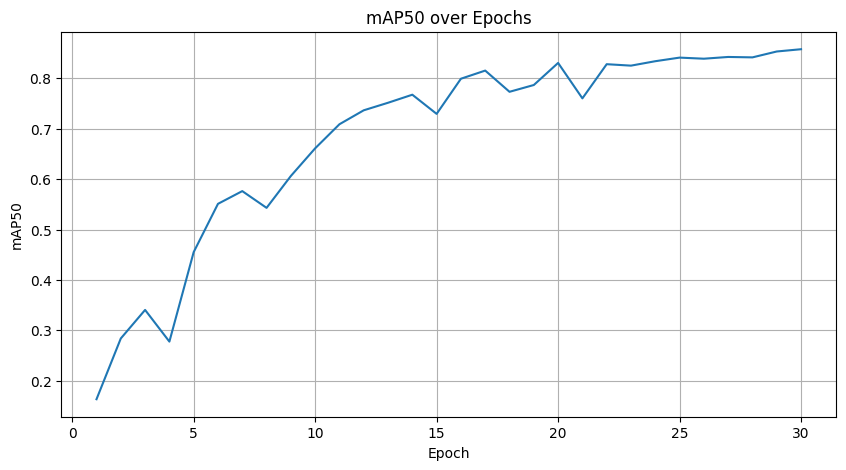

In [19]:
# PLOT TRAINING GRAPH (mAP50 over Epochs)

plt.figure(figsize=(10, 5))
plt.plot(df["epoch"], df["metrics/mAP50(B)"])
plt.title("mAP50 over Epochs")
plt.xlabel("Epoch")
plt.ylabel("mAP50")
plt.grid(True)
plt.show()

# **Model Evaluation**

In [20]:
# LOAD BEST MODEL

BEST_MODEL_PATH = '/content/runs/detect/train/weights/best.pt'
best_model = YOLO(BEST_MODEL_PATH)

In [21]:
# Evaluate On Test Dataset (After Prediction)

best_model.val(
    data = FIXED_YAML_PATH,
    split = 'test'
)

Ultralytics 8.4.13 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 73 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 547.4±297.9 MB/s, size: 10.8 KB)
val: Scanning /content/Animal_Detection_Datasets/test/labels... 100 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 100/100 2.5Kit/s 0.0s
val: New cache created: /content/Animal_Detection_Datasets/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 7/7 3.3it/s 2.1s
                   all        100        157      0.906       0.79      0.874      0.691
                   cat          7          7          1      0.853      0.864      0.651
               chicken         10         15      0.931      0.905      0.933      0.752
                   cow         10         21          1      0.615      0.828      0.634
                   dog         16         17      0.792

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a80cfdc0650>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

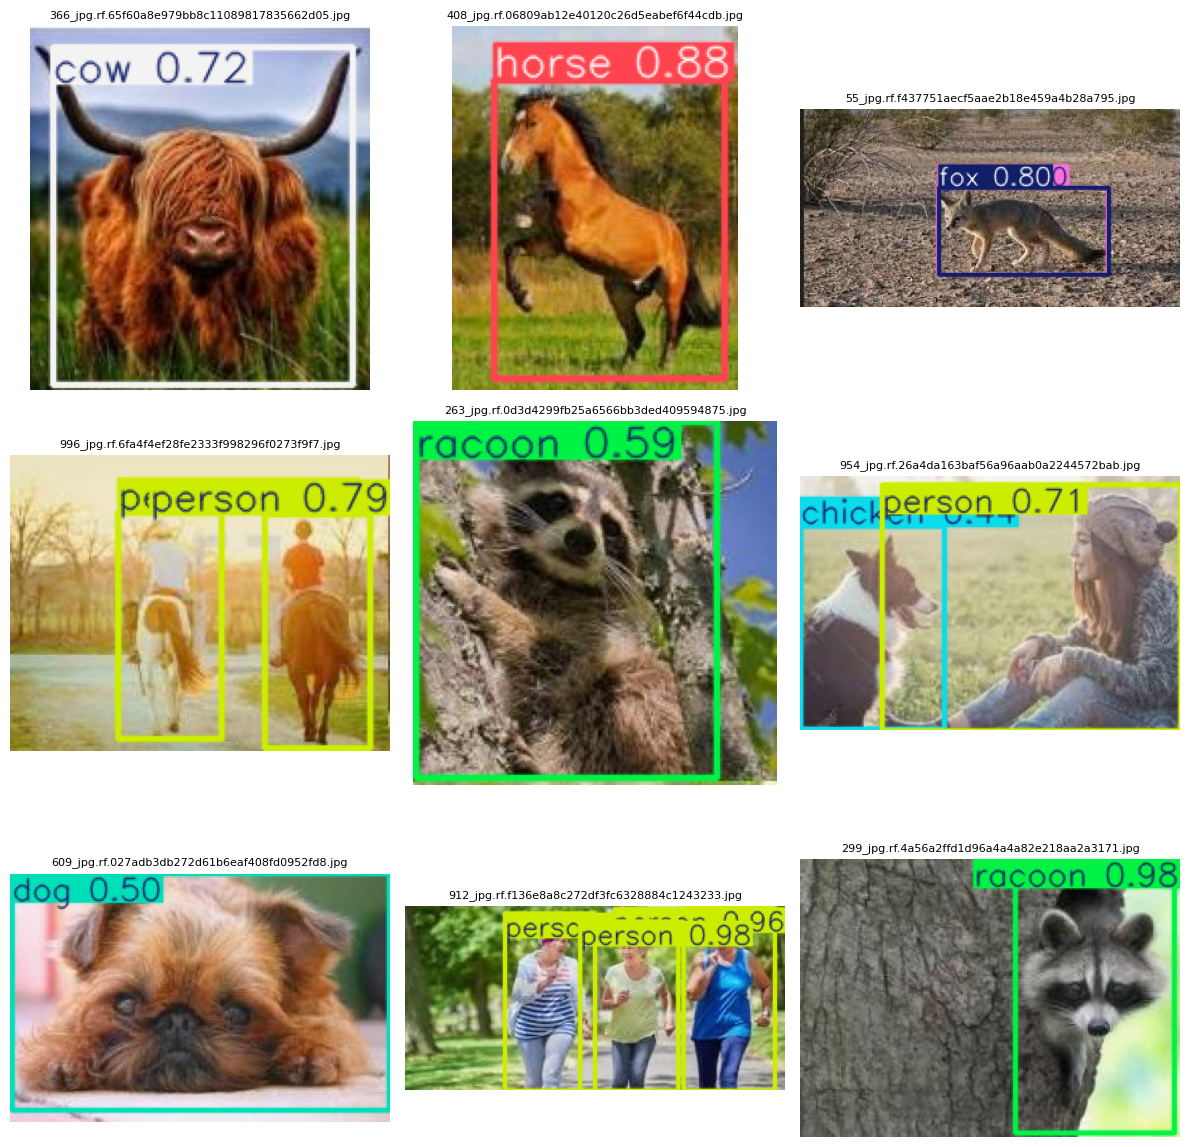

In [25]:
# VISUALIZE RANDOM TEST PREDICTIONS (AFTER TRAINING) - > Plot using yolo's result function

TEST_IMG_DIR = f'{dataset.location}/test/images'

test_images = os.listdir(TEST_IMG_DIR)
sample_test_images = random.sample(test_images, 9)

plt.figure(figsize=(12, 12))

for i, image_name in enumerate(sample_test_images):
  image_path = os.path.join(TEST_IMG_DIR, image_name)

  results = best_model.predict(image_path, conf=0.4, imgsz=640, verbose=False)[0]

  annotated_img = results.plot()
  #annotated_img = results.plot(conf=True, labels=False)

  annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

  plt.subplot(3, 3, i+1)
  plt.imshow(annotated_img)
  plt.title(image_name, fontsize=8)
  plt.axis('off')

plt.tight_layout()
plt.show()

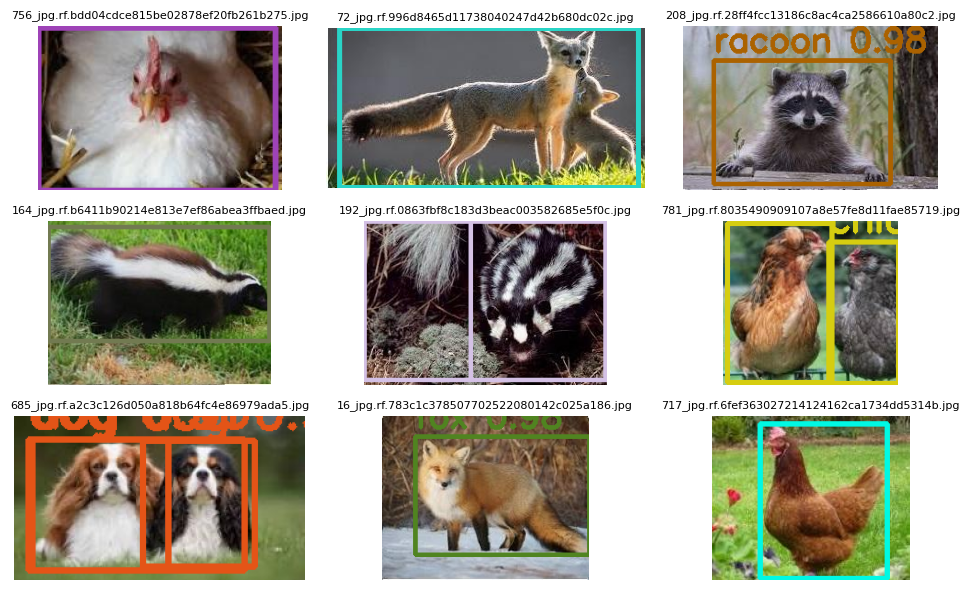

In [30]:
# ==========================================================
# FUNCTION: DRAW YOLO BOXES WITH RANDOM COLOR PER IMAGE
# ==========================================================
def draw_boxes_custom(image_path, results, font_scale=1.2, thickness=3):

    # Load image
    img = cv2.imread(image_path)

    # Random color for this image
    color = (
        random.randint(0, 255),
        random.randint(0, 255),
        random.randint(0, 255)
    )

    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = float(box.conf[0])
        cls = int(box.cls[0])   # ✅ class id (important if multiple classes)

        #label = f"Class {cls} | {conf:.2f}"
        # If you want class name:
        # label = f"{results.names[cls]} {conf:.2f}"
        class_name = results.names[cls]
        label = f"{class_name} {conf:.2f}"

        # Draw bounding box
        cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness)

        # Draw label text
        cv2.putText(
            img,
            label,
            (x1, y1 - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            font_scale,
            color,
            thickness
        )

    return img



# ==========================================================
# VISUALIZE RANDOM TEST PREDICTIONS (AFTER TRAINING) -> If you want to adjust bbox thickness & color of bbox use the above function then proceed below code
# ==========================================================
TEST_IMG_DIR = f"{dataset.location}/test/images"

test_images = os.listdir(TEST_IMG_DIR)
sample_test_imgs = random.sample(test_images, 9)

plt.figure(figsize=(10, 6))

for i, img_name in enumerate(sample_test_imgs):
    img_path = os.path.join(TEST_IMG_DIR, img_name)

    # Predict
    result = best_model.predict(img_path, conf=0.4, imgsz=640, verbose=False)[0]

    # Draw boxes using function
    annotated_img = draw_boxes_custom(img_path, result, font_scale=1.2, thickness=3)

    # Convert BGR -> RGB for matplotlib
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    # Plot
    plt.subplot(3, 3, i+1)
    plt.imshow(annotated_img)
    plt.title(img_name, fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()



In [31]:
# DOWNLOAD BEST MODEL (best.pt)

from google.colab import files
files.download(BEST_MODEL_PATH)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>